<a href="https://colab.research.google.com/github/KellyJJJ/tp-pod/blob/main/TP-POD/01_Fuente_de_Datos_Individual_TEMPLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Año:** 1er año
*   **Alumno/a:** Jiménez Kelly
*   **Legajo:** 1201203

# Archivos de texto plano

[gutenberg.org](https://www.gutenberg.org/) (llamado así por el inventor de la imprenta moderna) es el sitio web del Proyecto Gutenberg que se dedica a la distribución y creación de eBooks. En este sitio se encuentra el [Don Quijote](https://www.gutenberg.org/ebooks/14859). El Don Quijote se puede leer en diferentes formatos, ¿no? Para la tarea, se va a usar el Don Quijote de texto plano. La siguiente celda descarga el .txt y lo guarda en el sistema para luego su futura lectura:




In [ ]:
!wget https://www.gutenberg.org/cache/epub/2000/pg2000.txt

--2024-11-22 01:59:16--  https://www.gutenberg.org/cache/epub/2000/pg2000.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2225845 (2.1M) [text/plain]
Saving to: ‘pg2000.txt’

pg2000.txt          100%[===================>]   2.12M  4.99MB/s    in 0.4s    

2024-11-22 01:59:17 (4.99 MB/s) - ‘pg2000.txt’ saved [2225845/2225845]



## Consignas

***NOTA: Para estas consignas, no se puede usar modulos externos a Python***

Del archivo descargado, calcular la cantidad de lineas:

In [ ]:
with open ("pg2000.txt","r") as archivo:
  lineas = archivo.readlines()
  print("cantidad de lineas:",len(lineas))

cantidad de lineas: 38055


Del archivo descargado, calcular la cantidad de veces que se dice:
*   'Quijote'
*   'mancha'
*   'españa'

Considerar que, por ejemplo, 'QuiJoTe' es lo mismo que 'quijote' (no *case sensitive*).

In [ ]:
def contar_palabras(filename, palabras):
    conteos = {palabra: 0 for palabra in palabras}

    with open(filename, "r", encoding="utf-8") as archivo:
        for linea in archivo:
            linea = linea.lower()
            for palabra in palabras:
                conteos[palabra] += linea.count(palabra.lower())

    return conteos

archivo = "pg2000.txt"
palabras = ["quijote", "mancha", "españa"]

conteos = contar_palabras(archivo, palabras)

for palabra, conteo in conteos.items():
    print(f"La palabra '{palabra}' aparece {conteo} veces.")


La palabra 'quijote' aparece 2249 veces.
La palabra 'mancha' aparece 196 veces.
La palabra 'españa' aparece 78 veces.


¿Quien es el autor y titulo del libro? Responderlo usando las herramientas utilizadas en la celda anterior (Tip: abrir el archivo de texto y ver como son las primeras lineas).

In [ ]:
def obtenerTitulo(filename):
    lineas = [11, 13]
    with open(filename, "r", encoding="utf-8") as archivo:
        for i, linea in enumerate(archivo, start=1):
            if i in lineas:
                print(f"Línea {i}: {linea.strip()}")
            if i > max(lineas):
                break

archivo = "pg2000.txt"
obtenerTitulo(archivo)


Línea 11: Title: Don Quijote
Línea 13: Author: Miguel de Cervantes Saavedra


# Archivos .csv

*Robert* De Niro actuó en mas de 100 peliculas y Rotten Tomatoes es un sitio web en el que se pueden leer criticas y ratings a peliculas hechos por críticos y usuarios. La siguiente linea descarga un archivo .csv en el que tenemos peliculas de De Niro junto a su rating en Rotten Tomatoes:

In [ ]:
!wget https://people.sc.fsu.edu/~jburkardt/data/csv/deniro.csv

--2024-11-22 02:00:05--  https://people.sc.fsu.edu/~jburkardt/data/csv/deniro.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2391 (2.3K) [text/csv]
Saving to: ‘deniro.csv’

deniro.csv          100%[===================>]   2.33K  --.-KB/s    in 0s      

2024-11-22 02:00:05 (843 MB/s) - ‘deniro.csv’ saved [2391/2391]



## Consignas

***NOTA: Apartir de aca, se pueden usar modulos externos de Python***

Sabemos que el archivo tiene en su primera linea los 'headers'. ¿Cuales son? Imprimirlos.

In [ ]:
import csv

archivo_csv = "deniro.csv"
def imprimir_headers(filename):
    with open(filename, "r", encoding="utf-8") as archivo:
        lector_csv = csv.reader(archivo)
        headers = next(lector_csv)
        print("Headers encontrados:", headers)

imprimir_headers(archivo_csv)

Headers encontrados: ['Year', ' "Score"', ' "Title"']


Convertir la información del archivo .csv a un diccionario.

In [ ]:
def diccionarioCSV(filename):
    with open(filename, "r", encoding="utf-8") as archivo:
        lector_csv = csv.DictReader(archivo)
        dic = [fila for fila in lector_csv]
    return dic

datos = diccionarioCSV(archivo_csv)
for i, fila in enumerate(datos[:3], start=1):
    print(f"Fila {i}: {fila}")

Fila 1: {'Year': '1968', ' "Score"': '  86', ' "Title"': ' "Greetings"'}
Fila 2: {'Year': '1970', ' "Score"': '  17', ' "Title"': ' "Bloody Mama"'}
Fila 3: {'Year': '1970', ' "Score"': '  73', ' "Title"': ' "Hi', None: [' Mom!"']}


¿Cuantas peliculas hay registradas en el archivo .csv?

In [ ]:
with open(archivo_csv, "r", encoding="utf-8") as archivo:
    lector_csv = csv.reader(archivo)
    next(lector_csv)
    peliculas = sum(1 for _ in lector_csv)

print(f"El archivo contiene {peliculas} películas.")

El archivo contiene 88 películas.


Imprimir las peliculas mejor y peor rankeadas del archivo (imprimir sus respectivos rankings)

# Base de datos - Relacionales

SQLite es una biblioteca de C que provee una base de datos ligera basada en disco que no requiere un proceso de servidor separado y permite acceder a la base de datos usando una variación no estándar del lenguaje de consulta SQL. Algunas aplicaciones pueden usar SQLite para almacenamiento interno. También es posible prototipar una aplicación usando SQLite y luego transferir el código a una base de datos más grande como PostgreSQL u Oracle.

Realizamos el `import` e indicamos el archivo en el que vamos a guardar la base de datos:

In [ ]:
import sqlite3
conn = sqlite3.connect('db.db')

La siguiente linea de codigo agrega filas a la misma. Por favor, ejecutar la siguiente celda para la consigna:



In [ ]:
!wget https://people.sc.fsu.edu/~jburkardt/data/csv/snakes_count_10000.csv

cur = conn.cursor()
cur.execute("CREATE TABLE t (GameNumber, GameLength);")

with open('snakes_count_10000.csv','r') as csv_file:
  lines = csv_file.readlines()[1:]
  lines = [l.split(',') for l in lines]
  to_db = [(l[0].strip(), l[1].strip()) for l in lines]

cur.executemany("INSERT INTO t (GameNumber, GameLength) VALUES (?, ?);", to_db)
conn.commit()
conn.close()

--2024-11-22 17:09:42--  https://people.sc.fsu.edu/~jburkardt/data/csv/snakes_count_10000.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89011 (87K) [text/csv]
Saving to: ‘snakes_count_10000.csv’

snakes_count_10000. 100%[===================>]  86.92K   152KB/s    in 0.6s    

2024-11-22 17:09:44 (152 KB/s) - ‘snakes_count_10000.csv’ saved [89011/89011]



## Consignas

¿Como luce la base de datos? Imprimirla.


In [ ]:
conn = sqlite3.connect('db.db')
cur = conn.cursor()
cur.execute("SELECT * FROM t;")
print(cur.fetchall())
conn.close()

[('1', '30'), ('2', '29'), ('3', '31'), ('4', '16'), ('5', '24'), ('6', '29'), ('7', '28'), ('8', '117'), ('9', '42'), ('10', '23'), ('11', '40'), ('12', '15'), ('13', '18'), ('14', '51'), ('15', '15'), ('16', '19'), ('17', '30'), ('18', '25'), ('19', '17'), ('20', '55'), ('21', '20'), ('22', '12'), ('23', '39'), ('24', '25'), ('25', '56'), ('26', '61'), ('27', '77'), ('28', '34'), ('29', '14'), ('30', '8'), ('31', '31'), ('32', '34'), ('33', '22'), ('34', '12'), ('35', '52'), ('36', '50'), ('37', '24'), ('38', '20'), ('39', '91'), ('40', '33'), ('41', '27'), ('42', '25'), ('43', '83'), ('44', '12'), ('45', '21'), ('46', '38'), ('47', '20'), ('48', '24'), ('49', '37'), ('50', '18'), ('51', '56'), ('52', '20'), ('53', '47'), ('54', '51'), ('55', '22'), ('56', '46'), ('57', '24'), ('58', '35'), ('59', '28'), ('60', '12'), ('61', '28'), ('62', '43'), ('63', '50'), ('64', '37'), ('65', '127'), ('66', '11'), ('67', '12'), ('68', '22'), ('69', '25'), ('70', '57'), ('71', '53'), ('72', '38'),

¿Cuantas filas hay en la base de datos?

In [ ]:
conn = sqlite3.connect('db.db')
cur = conn.cursor()
cur.execute("SELECT * FROM t;")
print(len(cur.fetchall()))
conn.close()

10000


¿Cual es el máximo `GameLength` y en qué `GameNumber` se realizó?

In [ ]:
conn = sqlite3.connect('db.db')
cur = conn.cursor()
cur.execute("SELECT GameNumber, CAST(GameLength AS int) as gamelenghtnumber FROM t ORDER BY gamelenghtnumber DESC ;")
print(cur.fetchall())
conn.close()

[('4462', 203), ('202', 197), ('8669', 194), ('7531', 190), ('7720', 187), ('6608', 180), ('7387', 180), ('7911', 180), ('2614', 178), ('9737', 178), ('8646', 177), ('6981', 167), ('5230', 166), ('8802', 163), ('4700', 162), ('2308', 158), ('6207', 158), ('561', 157), ('7176', 156), ('9817', 156), ('4171', 155), ('6349', 153), ('707', 152), ('8856', 152), ('1829', 151), ('1945', 151), ('2645', 151), ('5058', 151), ('7717', 151), ('8309', 151), ('9623', 151), ('2759', 150), ('2898', 150), ('5158', 150), ('3342', 149), ('7402', 149), ('496', 144), ('2425', 144), ('3669', 144), ('3832', 144), ('4299', 144), ('4387', 143), ('8743', 142), ('5057', 141), ('5434', 141), ('5503', 141), ('7121', 141), ('8940', 141), ('4957', 140), ('1854', 139), ('9770', 139), ('9696', 138), ('5748', 137), ('112', 136), ('330', 136), ('5625', 135), ('9602', 135), ('1414', 134), ('2744', 134), ('7050', 134), ('277', 133), ('1616', 133), ('5160', 133), ('9779', 133), ('1348', 132), ('2399', 132), ('8719', 132), (

# API Requests
Por lo general, conseguimos datos a traves de internet. Aunque el concepto de Application Programming Interface (API) es muy amplio y muy poco concreto, en el contexto de los servidores, es un conjunto de 'endpoints' que los servidores ofrecen para poder leer/procesar/escribir información en estos mismos.

[En este repositorio](https://github.com/public-apis/public-apis) van a encontrar una lista de APIs públicas (pueden elegir otras que no son de ese repositorio). Para la consigna, se recomienda usar aquellas APIs que no requieren autenticación. Si se elige una API con autenticación, por favor, adjuntar las keys o pasarl las credenciales necesarias para su futura ejecución También, pueden usar varias URLs.

## Consigna

Hacer una request GET e imprimir uno de los campos de la respuesta:

In [ ]:
import requests
url="https://api.thecatapi.com/v1/images/search?limit=10"
response=requests.get(url)
if response.status_code==200:
  data=response.json()
  print("Datos:")
  print(data)
else:
  print("Error:", response.status_code)

Datos:
[{'id': '6r4', 'url': 'https://cdn2.thecatapi.com/images/6r4.jpg', 'width': 4320, 'height': 3240}, {'id': '86k', 'url': 'https://cdn2.thecatapi.com/images/86k.gif', 'width': 345, 'height': 247}, {'id': 'av4', 'url': 'https://cdn2.thecatapi.com/images/av4.jpg', 'width': 500, 'height': 333}, {'id': 'bcu', 'url': 'https://cdn2.thecatapi.com/images/bcu.jpg', 'width': 500, 'height': 306}, {'id': 'bv0', 'url': 'https://cdn2.thecatapi.com/images/bv0.jpg', 'width': 4608, 'height': 3072}, {'id': 'cfd', 'url': 'https://cdn2.thecatapi.com/images/cfd.jpg', 'width': 684, 'height': 1024}, {'id': 'dpj', 'url': 'https://cdn2.thecatapi.com/images/dpj.jpg', 'width': 900, 'height': 506}, {'id': 'MTcxNjg3OA', 'url': 'https://cdn2.thecatapi.com/images/MTcxNjg3OA.jpg', 'width': 900, 'height': 598}, {'id': 'MjA3MzYxNQ', 'url': 'https://cdn2.thecatapi.com/images/MjA3MzYxNQ.jpg', 'width': 405, 'height': 551}, {'id': '4qG-5FC0J', 'url': 'https://cdn2.thecatapi.com/images/4qG-5FC0J.jpg', 'width': 1689, 'h

Hacer una request GET y, apartir de los campos en la respuesta, generar otro campo (por ejemplo, si la respuesta solo incluye un timestamp y una posición del registro, elaborar la velocidad del registro)

In [ ]:
url = "https://api.thecatapi.com/v1/images/search?limit=10"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    for idx, record in enumerate(data):
        record["position"] = idx * 10
        record["timestamp"] = idx * 2
    for idx in range(1, len(data)):
        prev_record = data[idx - 1]
        curr_record = data[idx]
        delta_position = curr_record["position"] - prev_record["position"]
        delta_time = curr_record["timestamp"] - prev_record["timestamp"]

        if delta_time > 0:
            speed = delta_position / delta_time
        else:
            speed = 0
        curr_record["speed"] = speed

    print("velocidad calculada:")
    for record in data:
        print(record)
else:
    print("Error:", response.status_code)


velocidad calculada:
{'id': 'f5', 'url': 'https://cdn2.thecatapi.com/images/f5.jpg', 'width': 912, 'height': 609, 'position': 0, 'timestamp': 0}
{'id': '1ag', 'url': 'https://cdn2.thecatapi.com/images/1ag.gif', 'width': 350, 'height': 175, 'position': 10, 'timestamp': 2, 'speed': 5.0}
{'id': '3v8', 'url': 'https://cdn2.thecatapi.com/images/3v8.jpg', 'width': 3008, 'height': 2000, 'position': 20, 'timestamp': 4, 'speed': 5.0}
{'id': '6qf', 'url': 'https://cdn2.thecatapi.com/images/6qf.jpg', 'width': 604, 'height': 340, 'position': 30, 'timestamp': 6, 'speed': 5.0}
{'id': 'e2p', 'url': 'https://cdn2.thecatapi.com/images/e2p.jpg', 'width': 960, 'height': 720, 'position': 40, 'timestamp': 8, 'speed': 5.0}
{'id': 'MTk0NTQxOA', 'url': 'https://cdn2.thecatapi.com/images/MTk0NTQxOA.jpg', 'width': 612, 'height': 612, 'position': 50, 'timestamp': 10, 'speed': 5.0}
{'id': '_7U4xGLO_', 'url': 'https://cdn2.thecatapi.com/images/_7U4xGLO_.jpg', 'width': 800, 'height': 879, 'position': 60, 'timestamp

# Streaming data
Ahora vamos a hacer algo muy parecido a lo anterior, pero vamos a usar APIs que nos ofrecen datos en tiempo real. Pueden encontrar APIs de este estilo [en este repositorio](https://github.com/ColinEberhardt/awesome-public-streaming-datasets) (pueden elegir otras que no son de ese repositorio)

## Consigna

Hacer un plot con `matplotlib` de una variable de una API de datos streaming en el que el eje 'y' sea la variable y el eje 'x' el tiempo.

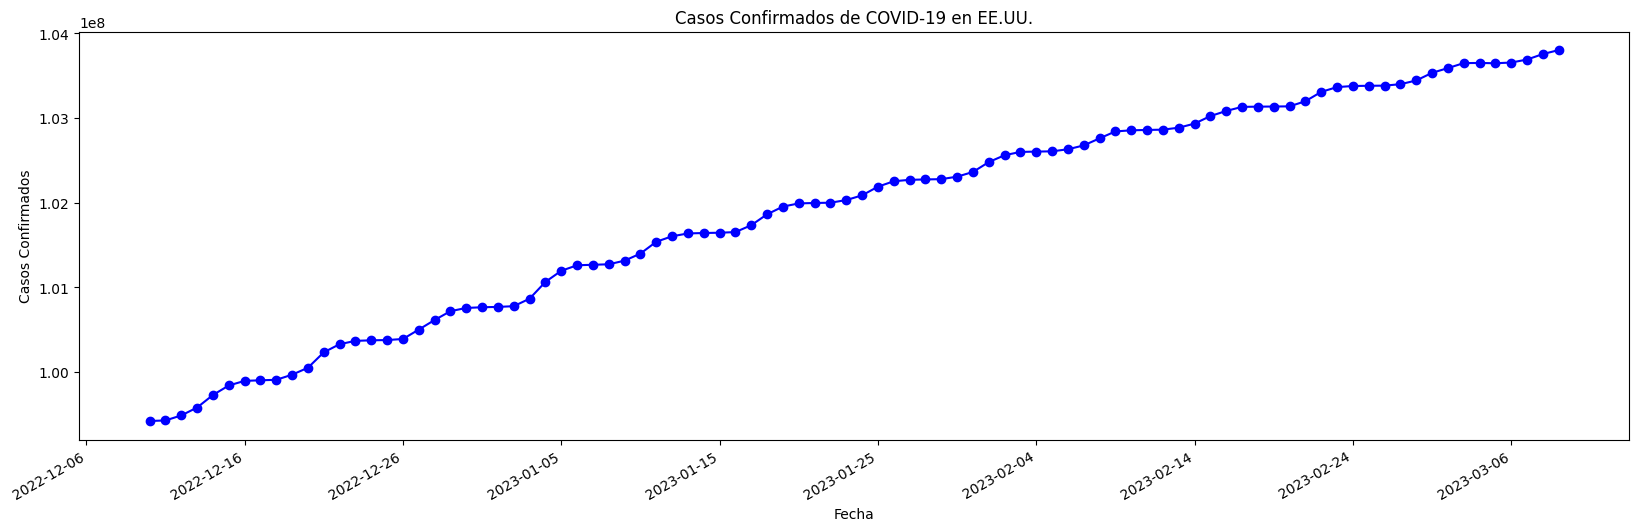

In [23]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

url = "https://disease.sh/v3/covid-19/historical/USA?lastdays=90"

response = requests.get(url)
data = response.json()

fechas = []
casos = []

timeline = data['timeline']['cases']
for date, case_count in timeline.items():
    fechas.append(datetime.strptime(date, '%m/%d/%y'))
    casos.append(case_count)

# Gráfico
plt.figure(figsize=(20, 6))
plt.plot(fechas, casos, marker='o', linestyle='-', color='b')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()

plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.title('Casos Confirmados de COVID-19 en EE.UU.')

plt.show()